In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import numpy as np
%matplotlib inline

In [39]:
reviews = pd.read_csv("Reviews.csv")
reviews.shape

(568454, 10)

In [40]:
reviews.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


EDA

In [41]:
reviews["Score"].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

Text(0.5, 1.0, 'Review Stars')

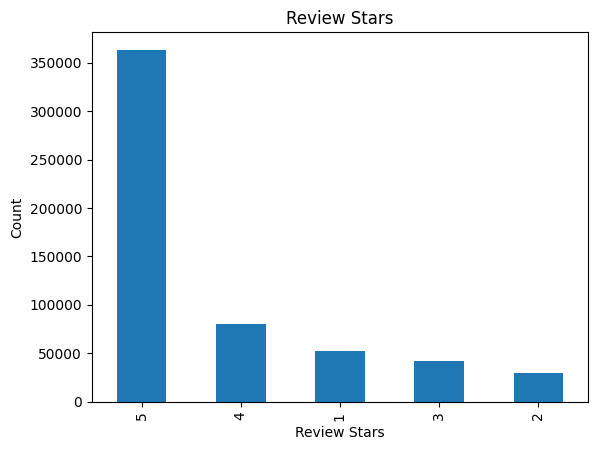

In [42]:
(reviews["Score"].value_counts()).plot(kind = "bar")
plt.xlabel("Review Stars")
plt.ylabel("Count")
plt.title("Review Stars")

In [43]:
one_example = reviews.Text[20]
one_example


"My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner."

In [44]:
word_tok = nltk.word_tokenize(one_example)
word_tok

['My',
 'husband',
 'is',
 'a',
 'Twizzlers',
 'addict',
 '.',
 'We',
 "'ve",
 'bought',
 'these',
 'many',
 'times',
 'from',
 'Amazon',
 'because',
 'we',
 "'re",
 'government',
 'employees',
 'living',
 'overseas',
 'and',
 'ca',
 "n't",
 'get',
 'them',
 'in',
 'the',
 'country',
 'we',
 'are',
 'assigned',
 'to',
 '.',
 'They',
 "'ve",
 'always',
 'been',
 'fresh',
 'and',
 'tasty',
 ',',
 'packed',
 'well',
 'and',
 'arrive',
 'in',
 'a',
 'timely',
 'manner',
 '.']

In [45]:
tag = nltk.pos_tag(word_tok)
tag

[('My', 'PRP$'),
 ('husband', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('Twizzlers', 'NNP'),
 ('addict', 'NN'),
 ('.', '.'),
 ('We', 'PRP'),
 ("'ve", 'VBP'),
 ('bought', 'VBN'),
 ('these', 'DT'),
 ('many', 'JJ'),
 ('times', 'NNS'),
 ('from', 'IN'),
 ('Amazon', 'NNP'),
 ('because', 'IN'),
 ('we', 'PRP'),
 ("'re", 'VBP'),
 ('government', 'NN'),
 ('employees', 'NNS'),
 ('living', 'VBG'),
 ('overseas', 'RB'),
 ('and', 'CC'),
 ('ca', 'MD'),
 ("n't", 'RB'),
 ('get', 'VB'),
 ('them', 'PRP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('country', 'NN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('assigned', 'VBN'),
 ('to', 'TO'),
 ('.', '.'),
 ('They', 'PRP'),
 ("'ve", 'VBP'),
 ('always', 'RB'),
 ('been', 'VBN'),
 ('fresh', 'JJ'),
 ('and', 'CC'),
 ('tasty', 'JJ'),
 (',', ','),
 ('packed', 'VBN'),
 ('well', 'RB'),
 ('and', 'CC'),
 ('arrive', 'JJ'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('timely', 'JJ'),
 ('manner', 'NN'),
 ('.', '.')]

In [46]:
ent = nltk.chunk.ne_chunk(tag)
ent.pprint()

(S
  My/PRP$
  husband/NN
  is/VBZ
  a/DT
  Twizzlers/NNP
  addict/NN
  ./.
  We/PRP
  've/VBP
  bought/VBN
  these/DT
  many/JJ
  times/NNS
  from/IN
  (GPE Amazon/NNP)
  because/IN
  we/PRP
  're/VBP
  government/NN
  employees/NNS
  living/VBG
  overseas/RB
  and/CC
  ca/MD
  n't/RB
  get/VB
  them/PRP
  in/IN
  the/DT
  country/NN
  we/PRP
  are/VBP
  assigned/VBN
  to/TO
  ./.
  They/PRP
  've/VBP
  always/RB
  been/VBN
  fresh/JJ
  and/CC
  tasty/JJ
  ,/,
  packed/VBN
  well/RB
  and/CC
  arrive/JJ
  in/IN
  a/DT
  timely/JJ
  manner/NN
  ./.)


VADER

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [48]:
sia.polarity_scores(one_example)

{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.6249}

In [68]:
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [65]:
!pip install ipywidgets